In [1]:
import numpy as np

In [2]:
link = "https://www.nps.gov/fova/learn/news/images/IMG_3409.JPG"

from PIL import Image
import requests
from io import BytesIO

response = requests.get(link)
img = Image.open(BytesIO(response.content))

In [3]:
img.thumbnail((320, 240), Image.ANTIALIAS)

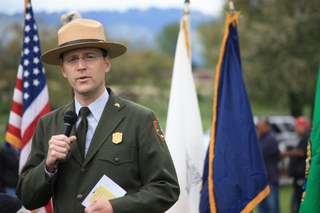

In [4]:
img

In [5]:
pix = img.load()
# print(pix[x,y]) gives pixels at point x,y 

In [6]:
img.size

(320, 213)

In [7]:
pixels = np.zeros((img.size[0]*img.size[1],3)) # Each row is a pixel. Each column is r, g, and b value. 

In [8]:
counter = 0
for i in range(img.size[0]):
    for j in range(img.size[1]):
        pixels[counter,] = np.asarray(pix[i,j])
        counter += 1

In [9]:
import math
def dist(x, y):
    return math.sqrt(np.sum((x-y)**2))

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def segment(k): 
    centroids = np.random.rand(k, 3)*255 # Initialize random centroids
    clusters = [] # Initialize empty vector of clusters
    clusters_old = [1] # Initialize a clusters_old vec (will be used to test for convergence)
    while clusters_old != clusters: # While the clusters are still changing
        clusters_old = clusters 
        clusters = []
        for i in range(pixels.shape[0]): # Go through each pixel
            dists = [] 
            for centroid in range(centroids.shape[0]):
                dists.append(dist(pixels[i,], centroids[centroid,])) # Assign pixel to closest centroid
            clusters.append(np.argmin(dists))
        for centroid in range(centroids.shape[0]): # Recompute centroids
            members = pixels[[p for p in range(len(clusters)) if clusters[p] == centroid],]
            centroids[centroid,] = np.mean(members, axis = 0) 
    
    final = np.zeros((320,213,3)) # Reconstruct our image based on our clustering results
    row = 0
    col = 0
    for i in range(len(clusters)):
        final[row,col] = centroids[clusters[i],]
        col += 1
        if col == 213:
            row += 1
            col = 0
    
    plt.imshow(final.transpose(1,0,2))
    plt.suptitle("K Means Clustering with K = %s" % k)

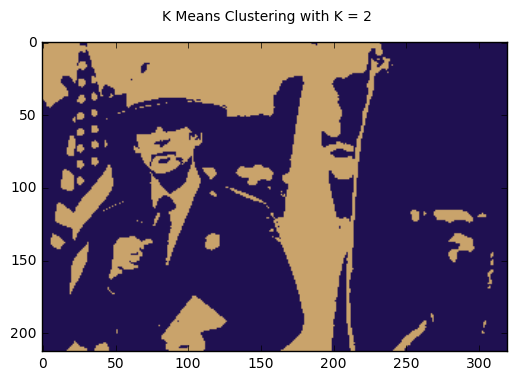

In [240]:
segment(2)

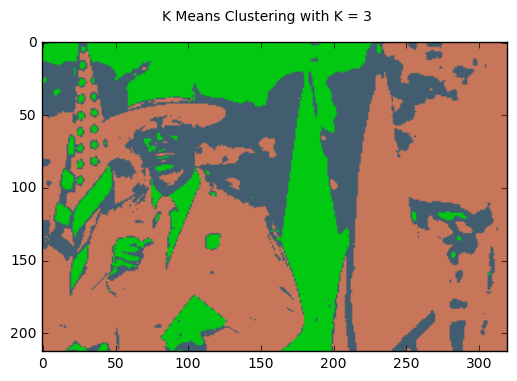

In [12]:
segment(3)

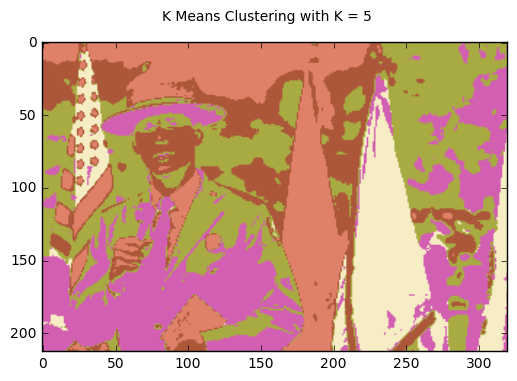

In [ ]:
segment(5)